## Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Load in data

In [2]:
df = pd.read_excel(r"C:\Users\USER\Desktop\Desktop\Starting Machine Learning\ML.xlsx")

In [3]:
df.head()

,Timestamp,Your height in meters,Your weight in kg,Your age in years,Your gender,Your marital Status,Highest educational attainment,Do you think those around you are living a better life than you?
0,2020-07-21 19:10:57.644,1.400,60.0,24,Female,Single,Tertiary (University),Neutral
1,2020-07-21 13:06:45.506,1.403,83.0,29,Male,Married,Tertiary (University),Neutral
2,2020-07-21 16:04:04.269,1.430,70.0,31,Female,Single,Tertiary (University),Agree
3,2020-07-21 20:55:51.228,1.450,62.0,24,Female,Single,Tertiary (University),Neutral
4,2020-07-21 14:13:19.083,1.460,60.0,29,Female,Single,Tertiary (University),Agree


### Check data properties

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 8 columns):
 #   Column                                                            Non-Null Count  Dtype         
---  ------                                                            --------------  -----         
 0   Timestamp                                                         147 non-null    datetime64[ns]
 1   Your height in meters                                             147 non-null    float64       
 2   Your weight in kg                                                 147 non-null    float64       
 3   Your age in years                                                 147 non-null    int64         
 4   Your gender                                                       147 non-null    object        
 5   Your marital Status                                               147 non-null    object        
 6   Highest educational attainment                                    147 non-n

In [5]:
df.shape

(147, 8)

In [6]:
df.isnull().sum()

Timestamp                                                           0
Your height in meters                                               0
Your weight in kg                                                   0
Your age in years                                                   0
Your gender                                                         0
Your marital Status                                                 0
Highest educational attainment                                      0
Do you think those around you are living a better life than you?    0
dtype: int64

### Exploratory Data Analysis

In [7]:
df.describe()

,Your height in meters,Your weight in kg,Your age in years
count,147.000000,147.000000,147.000000
mean,1.673329,72.071363,31.326531
std,0.106861,17.963880,8.473297
min,1.400000,35.000000,20.000000
25%,1.600000,60.000000,25.000000
50%,1.670000,70.000000,28.000000
75%,1.730000,80.000000,34.000000
max,2.010000,161.000000,61.000000


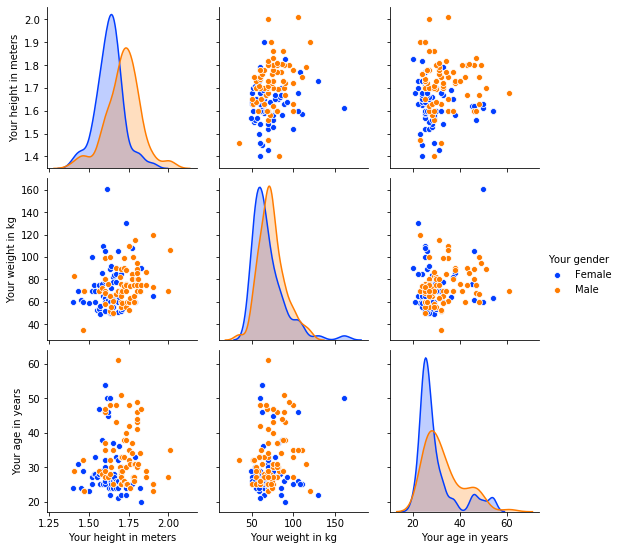

In [8]:
sns.set_palette("bright")
sns.pairplot(df, hue= "Your gender");

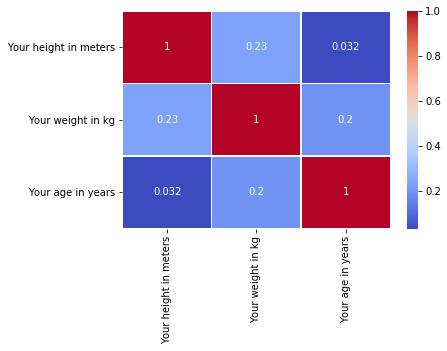

In [9]:
#Corellation matrix
sns.heatmap(df.corr(), annot=True, linewidths=0.5, cmap="coolwarm");

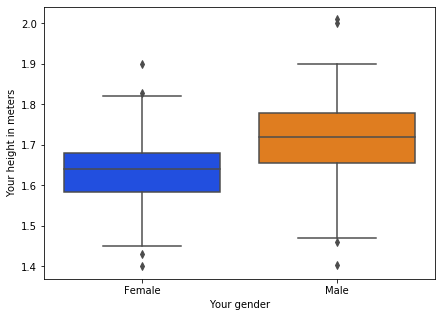

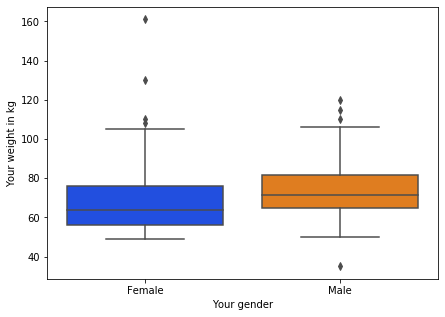

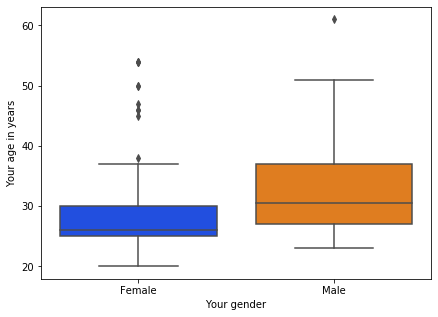

In [10]:
#Distribution of quantitative columns
for d in df[["Your height in meters", "Your weight in kg", "Your age in years"]]:
    fig = plt.figure(figsize=(7,5))
    sns.boxplot(x="Your gender", y=d, data=df)
    ax=fig.gca()

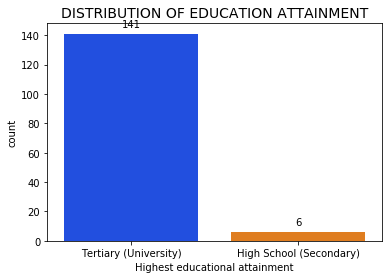

In [11]:
splot = sns.countplot(x="Highest educational attainment", data=df)
for p in splot.patches:
    splot.annotate(format(p.get_height()), (p.get_x()+p.get_width()/2.,p.get_height()), 
                   ha='center',va='center',xytext=(0,10),textcoords='offset points')
plt.title("DISTRIBUTION OF EDUCATION ATTAINMENT", size=14);

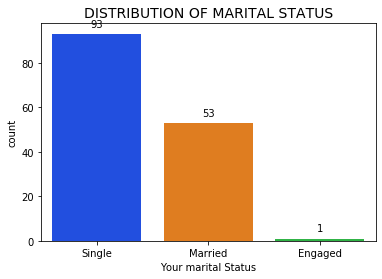

In [12]:
splot = sns.countplot(x="Your marital Status", data=df)
for p in splot.patches:
    splot.annotate(format(p.get_height()), (p.get_x()+p.get_width()/2.,p.get_height()), 
                   ha='center',va='center',xytext=(0,10),textcoords='offset points')
plt.title("DISTRIBUTION OF MARITAL STATUS", size=14);

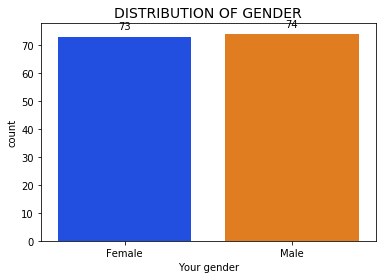

In [13]:
splot = sns.countplot(x="Your gender", data=df)
for p in splot.patches:
    splot.annotate(format(p.get_height()), (p.get_x()+p.get_width()/2.,p.get_height()), 
                   ha='center',va='center',xytext=(0,10),textcoords='offset points')
plt.title("DISTRIBUTION OF GENDER", size=14);

In [14]:
df.columns

Index(['Timestamp', 'Your height in meters', 'Your weight in kg',
       'Your age in years', 'Your gender', 'Your marital Status',
       'Highest educational attainment',
       'Do you think those around you are living a better life than you?'],
      dtype='object')

In [15]:
# Drop unnecessary columns
cols = ["Do you think those around you are living a better life than you?", "Timestamp"]
df = df.drop(columns=cols, axis=1)
df.head()

,Your height in meters,Your weight in kg,Your age in years,Your gender,Your marital Status,Highest educational attainment
0,1.400,60.0,24,Female,Single,Tertiary (University)
1,1.403,83.0,29,Male,Married,Tertiary (University)
2,1.430,70.0,31,Female,Single,Tertiary (University)
3,1.450,62.0,24,Female,Single,Tertiary (University)
4,1.460,60.0,29,Female,Single,Tertiary (University)


### Label Encoding

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
lb = LabelEncoder()

In [18]:
cols = ["Your gender", "Your marital Status", "Highest educational attainment"]
for col in cols:
    df[col] = lb.fit_transform(df[col])

In [19]:
df.head()

,Your height in meters,Your weight in kg,Your age in years,Your gender,Your marital Status,Highest educational attainment
0,1.400,60.0,24,0,2,1
1,1.403,83.0,29,1,1,1
2,1.430,70.0,31,0,2,1
3,1.450,62.0,24,0,2,1
4,1.460,60.0,29,0,2,1


### Feature Scaling

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scale = StandardScaler()

In [22]:
scale.fit(df.drop("Your age in years", axis =1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [23]:
scaled_features = scale.transform(df.drop("Your age in years", axis =1))

In [24]:
X = pd.DataFrame(data=scaled_features, columns=["Your height in meters", "Your weight in kg", "Your gender", "Your marital Status", "Highest educational attainment"])

In [25]:
X.head()

,Your height in meters,Your weight in kg,Your gender,Your marital Status,Highest educational attainment
0,-2.566547,-0.674277,-1.006826,0.751664,0.206284
1,-2.538378,0.610447,0.993220,-1.257328,0.206284
2,-2.284849,-0.115701,-1.006826,0.751664,0.206284
3,-2.097050,-0.562562,-1.006826,0.751664,0.206284
4,-2.003151,-0.674277,-1.006826,0.751664,0.206284


### Linear Regression Model

In [26]:
#Assign dependent varible and independent varibles
y = df["Your age in years"] #Dependent varible
X = X #Independent varibles

In [27]:
#Split data using train_test_split
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
lm = LinearRegression()

In [31]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
lm.intercept_

31.2603365473602

In [33]:
pd.DataFrame(lm.coef_, X.columns, columns=["Coeff"])

,Coeff
Your height in meters,-0.277970
Your weight in kg,0.331394
Your gender,0.321191
Your marital Status,-5.358373
Highest educational attainment,0.083639


### Predictions

In [34]:
prediction = lm.predict(X_test)

### Model Evaluation

In [35]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [36]:
print(f"The mean absolute error: {mean_absolute_error(y_test,prediction)}")
print(f"The mean squared error: {mean_squared_error(y_test,prediction)}")
print(f"The root squared mean error: {np.sqrt(mean_squared_error(y_test,prediction))}")
print(f"The R2 Score: {r2_score(y_test,prediction)}")

The mean absolute error: 5.47784492595246
The mean squared error: 70.82306898209009
The root squared mean error: 8.415644299879249
The R2 Score: 0.1487402637756472


In [37]:
from sklearn.model_selection import cross_val_score

In [38]:
score = cross_val_score(lm, X, y, cv=5)
print(round(np.mean(score)*100,2))

15.32


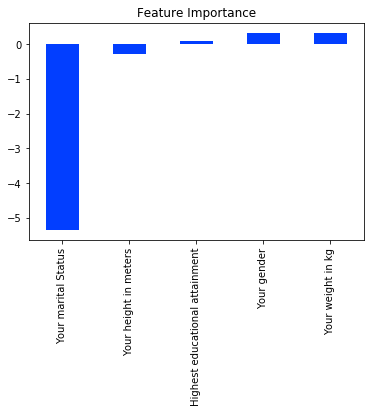

In [39]:
coef = pd.Series(lm.coef_, X.columns).sort_values()
coef.plot(kind="bar", title="Feature Importance")

### KNN Regression Model

In [40]:
from sklearn.neighbors import KNeighborsRegressor

In [61]:
knn = KNeighborsRegressor(n_neighbors=1)

In [62]:
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                    weights='uniform')

In [63]:
pred = knn.predict(X_test)

In [64]:
print(f"The mean absolute error: {mean_absolute_error(y_test,pred)}")
print(f"The mean squared error: {mean_squared_error(y_test,pred)}")
print(f"The root squared mean error: {np.sqrt(mean_squared_error(y_test,pred))}")
print(f"The R2 Score: {r2_score(y_test,pred)}")
score = cross_val_score(lm, X, y, cv=5)
print(f"The Cross Validation Score: {round(np.mean(score)*100,2)}")

The mean absolute error: 5.297297297297297
The mean squared error: 61.513513513513516
The root squared mean error: 7.843055113507332
The R2 Score: 0.2606367100388066
The Cross Validation Score: 15.32


In [59]:
error_rate = []
for i in range(1,60):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

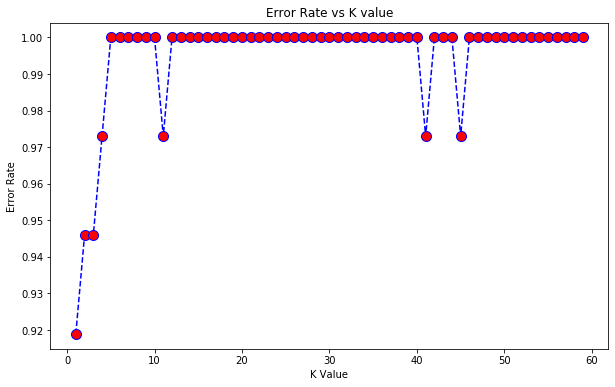

In [60]:
plt.figure(figsize=(10,6))
plt.plot(range(1,60), error_rate,color="blue", linestyle="dashed", marker="o",
        markerfacecolor="red", markersize=10)
plt.title("Error Rate vs K value")
plt.xlabel("K Value")
plt.ylabel("Error Rate");

### Decision Tree Regressor

In [65]:
from sklearn.tree import DecisionTreeRegressor

In [66]:
dt = DecisionTreeRegressor()

In [68]:
dt.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [69]:
pred = dt.predict(X_test)

In [70]:
print(f"The mean absolute error: {mean_absolute_error(y_test,pred)}")
print(f"The mean squared error: {mean_squared_error(y_test,pred)}")
print(f"The root squared mean error: {np.sqrt(mean_squared_error(y_test,pred))}")
print(f"The R2 Score: {r2_score(y_test,pred)}")
score = cross_val_score(lm, X, y, cv=5)
print(f"The Cross Validation Score: {round(np.mean(score)*100,2)}")

The mean absolute error: 5.594594594594595
The mean squared error: 64.78378378378379
The root squared mean error: 8.048837418148276
The R2 Score: 0.22132961070431434
The Cross Validation Score: 15.32


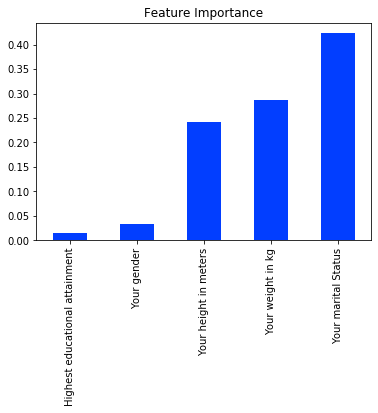

In [78]:
coef = pd.Series(dt.feature_importances_, X.columns).sort_values()
coef.plot(kind="bar", title="Feature Importance")

### Random Forest Regressor

In [71]:
from sklearn.ensemble import RandomForestRegressor

In [72]:
rf = RandomForestRegressor()

In [73]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [75]:
pred = rf.predict(X_test)

In [76]:
print(f"The mean absolute error: {mean_absolute_error(y_test,pred)}")
print(f"The mean squared error: {mean_squared_error(y_test,pred)}")
print(f"The root squared mean error: {np.sqrt(mean_squared_error(y_test,pred))}")
print(f"The R2 Score: {r2_score(y_test,pred)}")
score = cross_val_score(lm, X, y, cv=5)
print(f"The Cross Validation Score: {round(np.mean(score)*100,2)}")

The mean absolute error: 4.564689832689832
The mean squared error: 38.62440793773366
The root squared mean error: 6.2148538146712395
The R2 Score: 0.5357529151806232
The Cross Validation Score: 15.32


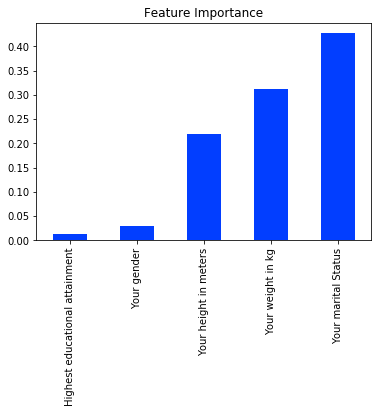

In [80]:
coef = pd.Series(rf.feature_importances_, X.columns).sort_values()
coef.plot(kind="bar", title="Feature Importance")

### ExtraTrees Regressor

In [81]:
from sklearn.ensemble import ExtraTreesRegressor

In [87]:
et = ExtraTreesRegressor(n_jobs=1)

In [88]:
et.fit(X_train, y_train)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=1, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [89]:
pred = et.predict(X_test)

In [90]:
print(f"The mean absolute error: {mean_absolute_error(y_test,pred)}")
print(f"The mean squared error: {mean_squared_error(y_test,pred)}")
print(f"The root squared mean error: {np.sqrt(mean_squared_error(y_test,pred))}")
print(f"The R2 Score: {r2_score(y_test,pred)}")
score = cross_val_score(lm, X, y, cv=5)
print(f"The Cross Validation Score: {round(np.mean(score)*100,2)}")

The mean absolute error: 4.228108108108109
The mean squared error: 36.20486891891892
The root squared mean error: 6.01704818984516
The R2 Score: 0.5648346279126938
The Cross Validation Score: 15.32
